In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Непрерывное распределение
Для решения задачи будет использовано треугольное распределение. 
c - мода данного распределения. a - нижняя граница, b - верхняя.

a = 0, b = 1, c = 0.2

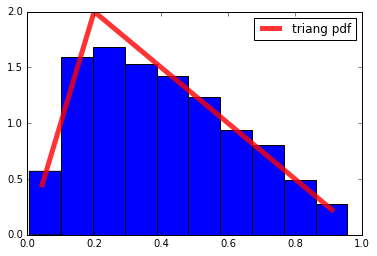

In [5]:
c = 0.2
n = 1000
a = 0
b = 1.0
rvs = sts.triang.rvs(c, size=n)
x = np.linspace(sts.triang.ppf(0.01, c), sts.triang.ppf(0.99, c), 1000)
plt.plot(x, sts.triang.pdf(x, c),'r-', lw=5, alpha=0.8, label='triang pdf')
# rvs = sts.laplace.rvs(c, size=n)
# x = np.linspace(sts.laplace.ppf(0.01, c), sts.laplace.ppf(0.99, c), 1000)
# plt.plot(x, sts.laplace.pdf(x, c),'r-', lw=5, alpha=0.8, label='triang pdf')
plt.hist(rvs, normed = True)
plt.legend(loc='upper right')

## Генерация выборок
сгенерируем 1000 выборок объема n и построим гистограмму их выборочных средних


In [6]:
means_n = {}
for n in [5,10,50]:
    means = []
    for i in range(1000):
        rvs = sts.triang.rvs(c, size=n)
        means.append(np.mean(rvs))
    means_n[n] = means

Параметры данного распределения:

$ M = \frac{(a+b+c)}{3} $

$ D = \frac{a^2 + b^2 + c^2 - a*b - b*c - a*c}{18}$

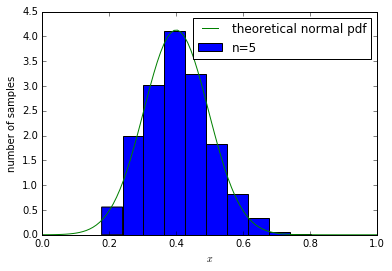

In [12]:
def clt_proof(n):
    plt.hist(means_n[n], normed=True, alpha = 1,label='n='+str(n))
    norm_rv = sts.norm((a+b+c)/3.0, ((a**2 + b**2 + c**2 - a*b - b*c - a*c)/(n*18.0))**(1/2.0) )
    x = np.linspace(0,1,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='theoretical normal pdf', alpha=1)
    plt.legend(loc='upper right')
    plt.ylabel('number of samples')
    plt.xlabel('$x$')

clt_proof(5)

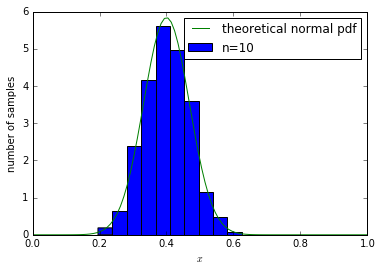

In [13]:
clt_proof(10)

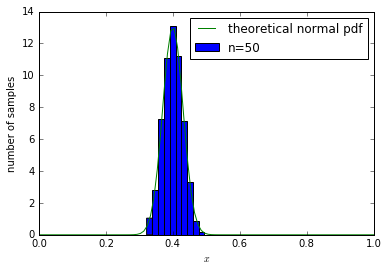

In [15]:
clt_proof(50)

## Вывод:
 Распределение выборочных средних можно описать нормальным.При увеличении n наша гистограмма становится более сконцентрированной вокруг среднего значения, а распределение лучше описывается нормальным